In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt 

In [2]:
track = pd.read_csv('tf_mini.csv')
session = pd.read_csv('log_mini.csv')

In [3]:
track.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [4]:
session.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0.0,0.0,...,0.0,0.0,0.0,True,16.0,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [7]:
track = track.drop_duplicates(keep='first')
session = session.drop_duplicates(keep='first')

In [8]:
track.describe

<bound method NDFrame.describe of                                      track_id    duration  release_year  \
0      t_a540e552-16d4-42f8-a185-232bd650ea7d  109.706673          1950   
1      t_67965da0-132b-4b1e-8a69-0ef99b32287c  187.693329          1950   
2      t_0614ecd3-a7d5-40a1-816e-156d5872a467  160.839996          1951   
3      t_070a63a0-744a-434e-9913-a97b02926a29  175.399994          1951   
4      t_d6990e17-9c31-4b01-8559-47d9ce476df1  369.600006          1951   
...                                       ...         ...           ...   
50699  t_402930af-4174-47ec-b1fd-593d93597624  184.686798          2018   
50700  t_e5f9a069-a893-452e-ab21-49b4eaebfbd0  251.813324          2018   
50701  t_3983306d-13b4-4027-9391-7236ca93d2bf  157.520004          2018   
50702  t_74eb6e99-210b-440c-8d7b-4db6617d1c80  129.105392          2018   
50703  t_aec0dda3-19b4-4222-be07-327c12f21456  213.689392          2018   

       us_popularity_estimate  acousticness  beat_strength  bounc

In [9]:
session.describe

<bound method NDFrame.describe of                                   session_id  session_position  \
0     0_00006f66-33e5-4de7-a324-2d18e439fc1e               1.0   
1     0_00006f66-33e5-4de7-a324-2d18e439fc1e               2.0   
2     0_00006f66-33e5-4de7-a324-2d18e439fc1e               3.0   
3     0_00006f66-33e5-4de7-a324-2d18e439fc1e               4.0   
4     0_00006f66-33e5-4de7-a324-2d18e439fc1e               5.0   
...                                      ...               ...   
6090  0_007ecb19-9d2a-411d-a523-ff7123ccb0f1               4.0   
6091  0_007ecb19-9d2a-411d-a523-ff7123ccb0f1               5.0   
6092  0_007ecb19-9d2a-411d-a523-ff7123ccb0f1               6.0   
6093  0_007ecb19-9d2a-411d-a523-ff7123ccb0f1               7.0   
6094  0_007ecb19-9d2a-411d-a523-ff7123ccb0f1               NaN   

      session_length                          track_id_clean skip_1 skip_2  \
0               20.0  t_0479f24c-27d2-46d6-a00c-7ec928f2b539  False  False   
1               2

In [10]:
track.columns

Index(['track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7'],
      dtype='object')

In [11]:
session.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [43]:
session = session.dropna()

In [45]:
track = track.dropna()

In [46]:
track.shape

(50704, 30)

In [44]:
session.shape

(6094, 21)

In [22]:
track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50704 entries, 0 to 50703
Data columns (total 30 columns):
track_id                  50704 non-null object
duration                  50704 non-null float64
release_year              50704 non-null int64
us_popularity_estimate    50704 non-null float64
acousticness              50704 non-null float64
beat_strength             50704 non-null float64
bounciness                50704 non-null float64
danceability              50704 non-null float64
dyn_range_mean            50704 non-null float64
energy                    50704 non-null float64
flatness                  50704 non-null float64
instrumentalness          50704 non-null float64
key                       50704 non-null int64
liveness                  50704 non-null float64
loudness                  50704 non-null float64
mechanism                 50704 non-null float64
mode                      50704 non-null object
organism                  50704 non-null float64
speechiness    

In [47]:
session.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6094 entries, 0 to 6093
Data columns (total 21 columns):
session_id                         6094 non-null object
session_position                   6094 non-null float64
session_length                     6094 non-null float64
track_id_clean                     6094 non-null object
skip_1                             6094 non-null object
skip_2                             6094 non-null object
skip_3                             6094 non-null object
not_skipped                        6094 non-null object
context_switch                     6094 non-null float64
no_pause_before_play               6094 non-null float64
short_pause_before_play            6094 non-null float64
long_pause_before_play             6094 non-null float64
hist_user_behavior_n_seekfwd       6094 non-null float64
hist_user_behavior_n_seekback      6094 non-null float64
hist_user_behavior_is_shuffle      6094 non-null object
hour_of_day                        6094 non-n

In [48]:
most_heard_tracks = track.sort_values(by ='us_popularity_estimate', ascending=False)
most_heard_tracks['track_id']

29040    t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5
37760    t_abe577df-bc3e-48ff-a13c-f2fd7a295ba6
42947    t_9229bbff-130d-4668-8e84-6b35c7b7cea0
10518    t_bacf06d3-9185-4183-84ea-ff0db51475ce
33899    t_8c4d29b1-e0bf-464c-88f7-ac19240cbba0
                          ...                  
43418    t_7705d39d-289a-42a8-b10e-a0bfcdfcfb5d
34501    t_30ce0f39-7514-49bd-8e51-6ed561f9e9c6
2627     t_2c4e2620-7434-47ae-9198-1337f44ec94b
11       t_b7836048-8004-4e5a-a22b-d7061437946e
22823    t_be0603c9-39db-4a3f-b064-41323a01b28b
Name: track_id, Length: 50704, dtype: object

In [61]:
pd.unique(session['session_id'])

array(['0_00006f66-33e5-4de7-a324-2d18e439fc1e',
       '0_0000a72b-09ac-412f-b452-9b9e79bded8f',
       '0_00010fc5-b79e-4cdf-bc4c-f140d0f99a3a',
       '0_00016a3d-9076-4f67-918f-f29e3ce160dc',
       '0_00018b58-deb8-4f98-ac5e-d7e01b346130',
       '0_00027db1-ffe5-4b00-8eeb-8d8188451298',
       '0_00029482-6542-4d3e-bb9e-ffc988f58bd6',
       '0_0002fbb5-29c2-4d54-9636-e6d15e77b58c',
       '0_00030fe3-298d-4930-8534-fc5a9b82971b',
       '0_0003ac37-c70a-47a6-b9dc-b8b163826082',
       '0_0003e8a0-ea43-47fe-ac5a-8b502f4d38ef',
       '0_00041f88-6d8a-49ca-9a03-d0cfdbbafe5e',
       '0_00052b3c-a5f9-4b04-90ef-6378777d89d8',
       '0_00054512-7872-45c0-aaec-7b790f698a4f',
       '0_0005a7a1-196e-4e08-8928-39b9a3ca2e1a',
       '0_0006380b-324b-45db-a597-ac209b1375b2',
       '0_000641b5-a2ce-4803-bdeb-499c548ba50d',
       '0_00064a92-1353-417a-82e2-6f5e361bebff',
       '0_0006bfe8-8afe-45c2-a423-00a348b775c4',
       '0_0006f5f8-bd71-4d75-9cd2-6320f2e4df8e',
       '0_00070b9a-c

In [86]:
tracks_per_session = session.groupby('session_id')['track_id_clean'].count()

In [87]:
tracks_per_session

session_id
0_00006f66-33e5-4de7-a324-2d18e439fc1e    20
0_0000a72b-09ac-412f-b452-9b9e79bded8f    20
0_00010fc5-b79e-4cdf-bc4c-f140d0f99a3a    20
0_00016a3d-9076-4f67-918f-f29e3ce160dc    20
0_00018b58-deb8-4f98-ac5e-d7e01b346130    11
                                          ..
0_007e2fd9-34c0-4025-93cf-f2601a683ad5    17
0_007e4334-2955-4b17-b989-760e31aa08c0    20
0_007e4899-2e85-406d-91e4-d0abaf6c6931    16
0_007ec629-e176-4ecc-a04c-cea9e9d6498b    20
0_007ecb19-9d2a-411d-a523-ff7123ccb0f1     7
Name: track_id_clean, Length: 363, dtype: int64

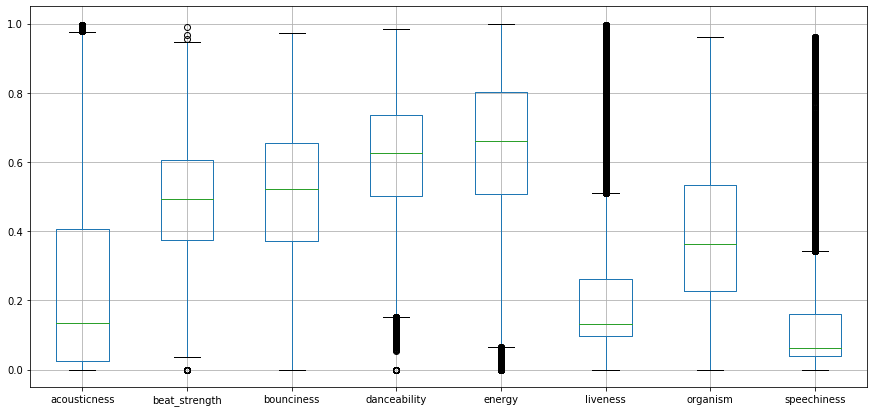

In [91]:
plt.figure(figsize = (15, 7))
track.boxplot(column = ['acousticness', 'beat_strength', 'bounciness', 'danceability',
                      'energy', 'liveness', 'organism', 'speechiness'])
plt.show()

In [77]:
track.corr()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
duration,1.000000,-0.123812,0.005794,-0.066920,-0.131375,-0.143085,-0.152487,-0.142970,0.053897,-0.041529,...,0.038261,-0.131120,0.126287,-0.067927,-0.044738,-0.092776,0.021711,0.095608,-0.019390,-0.036220
release_year,-0.123812,1.000000,0.048983,-0.063057,0.031684,0.068949,0.123156,0.088684,0.037645,0.166384,...,-0.001024,-0.196870,-0.304815,0.446365,0.175220,-0.095951,-0.445240,0.165827,-0.022491,0.367377
us_popularity_estimate,0.005794,0.048983,1.000000,-0.033157,-0.010055,-0.011667,0.019028,-0.015841,0.013962,0.036104,...,0.014907,-0.047121,-0.042968,0.112599,0.044890,-0.098165,-0.062545,0.089008,-0.097104,-0.006043
acousticness,-0.066920,-0.063057,-0.033157,1.000000,-0.039047,0.011260,-0.135534,0.026024,-0.589284,0.240645,...,-0.164562,-0.064798,0.229873,-0.482740,-0.049402,0.263462,0.118781,-0.318185,0.201371,-0.323359
beat_strength,-0.131375,0.031684,-0.010055,-0.039047,1.000000,0.965449,0.875388,0.890020,-0.092329,0.254037,...,0.087535,0.392916,-0.570606,0.017956,0.448649,0.471974,-0.193113,-0.263653,-0.029117,0.141938
bounciness,-0.143085,0.068949,-0.011667,0.011260,0.965449,1.000000,0.861732,0.964180,-0.125831,0.261241,...,0.063381,0.376612,-0.621733,0.017296,0.469313,0.525661,-0.221772,-0.321632,-0.028093,0.157158
danceability,-0.152487,0.123156,0.019028,-0.135534,0.875388,0.861732,1.000000,0.797185,0.007332,0.230329,...,0.122936,0.365606,-0.576081,0.174176,0.501327,0.352295,-0.227383,-0.117028,-0.033706,0.163159
dyn_range_mean,-0.142970,0.088684,-0.015841,0.026024,0.890020,0.964180,0.797185,1.000000,-0.141294,0.233629,...,0.039211,0.326187,-0.598165,0.018196,0.417054,0.506420,-0.232876,-0.339241,-0.034936,0.171656
energy,0.053897,0.037645,0.013962,-0.589284,-0.092329,-0.125831,0.007332,-0.141294,1.000000,-0.612874,...,0.105495,0.277323,-0.115998,0.470590,-0.021400,-0.215074,0.064382,0.250470,0.008287,0.256301
flatness,-0.041529,0.166384,0.036104,0.240645,0.254037,0.261241,0.230329,0.233629,-0.612874,1.000000,...,0.018966,-0.211343,-0.187046,-0.103886,0.356926,0.209277,-0.170901,-0.023206,0.025370,-0.083520


In [78]:
session.corr()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
session_position,1.000000,0.308673,-0.014715,0.182487,0.035145,0.039115,-0.065956,-0.061675,-0.021680
session_length,0.308673,1.000000,-0.037670,0.070177,-0.025247,-0.039852,0.000438,-0.012303,-0.022739
context_switch,-0.014715,-0.037670,1.000000,-0.010282,0.020175,0.043051,0.037876,0.036997,-0.016451
no_pause_before_play,0.182487,0.070177,-0.010282,1.000000,-0.742204,-0.827605,-0.074934,-0.096155,-0.014385
short_pause_before_play,0.035145,-0.025247,0.020175,-0.742204,1.000000,0.896810,0.003786,0.026560,0.011351
long_pause_before_play,0.039115,-0.039852,0.043051,-0.827605,0.896810,1.000000,0.008740,0.063897,0.015540
hist_user_behavior_n_seekfwd,-0.065956,0.000438,0.037876,-0.074934,0.003786,0.008740,1.000000,0.095806,-0.011317
hist_user_behavior_n_seekback,-0.061675,-0.012303,0.036997,-0.096155,0.026560,0.063897,0.095806,1.000000,-0.006420
hour_of_day,-0.021680,-0.022739,-0.016451,-0.014385,0.011351,0.015540,-0.011317,-0.006420,1.000000


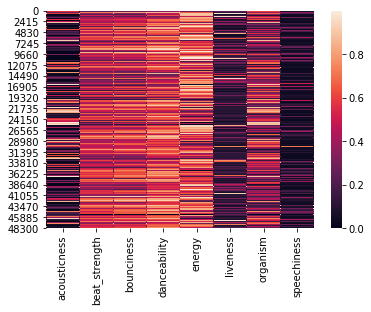

In [94]:
df = track[['acousticness', 'beat_strength', 'bounciness', 'danceability',
                      'energy', 'liveness', 'organism', 'speechiness']]
sns.heatmap(df)

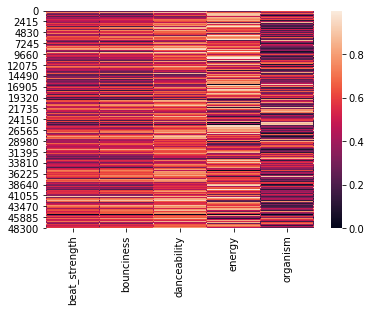

In [107]:
df = track[['beat_strength', 'bounciness', 'danceability',
                      'energy', 'organism']]
sns.heatmap(df)

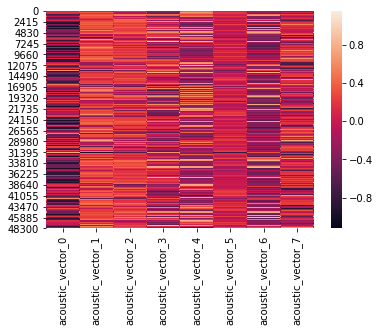

In [112]:
df = track[['acoustic_vector_0','acoustic_vector_1','acoustic_vector_2','acoustic_vector_3',
            'acoustic_vector_4','acoustic_vector_5','acoustic_vector_6', 'acoustic_vector_7']]
sns.heatmap(df)

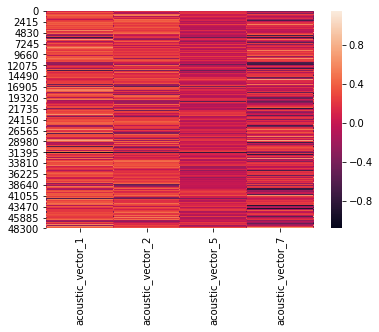

In [113]:
df = track[['acoustic_vector_1','acoustic_vector_2','acoustic_vector_5', 'acoustic_vector_7']]
sns.heatmap(df)

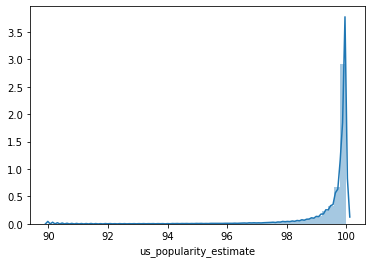

In [111]:
sns.distplot(track['us_popularity_estimate'])

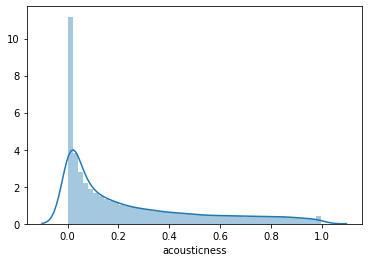

In [97]:
sns.distplot(df['acousticness'])

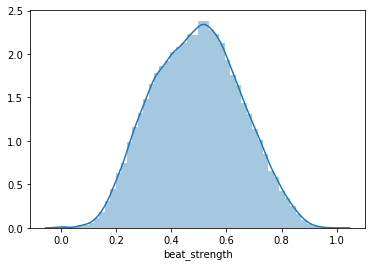

In [98]:
sns.distplot(df['beat_strength'])

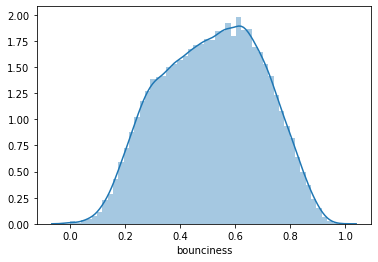

In [99]:
sns.distplot(df['bounciness'])

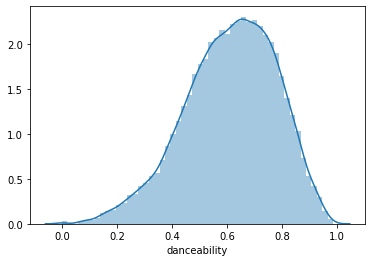

In [100]:
sns.distplot(df['danceability'])

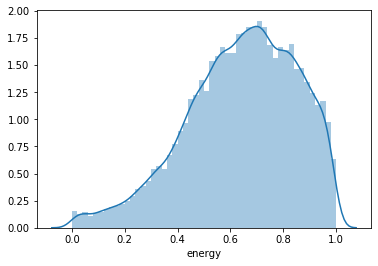

In [101]:
sns.distplot(df['energy'])

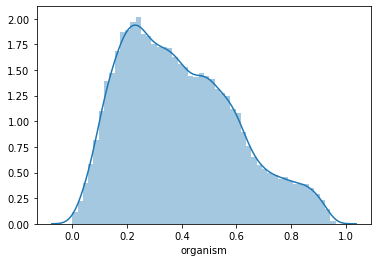

In [102]:
sns.distplot(df['organism'])

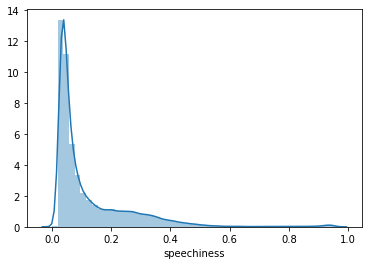

In [103]:
sns.distplot(df['speechiness'])

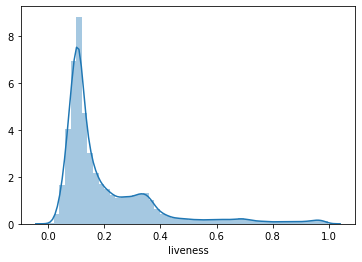

In [104]:
sns.distplot(df['liveness'])

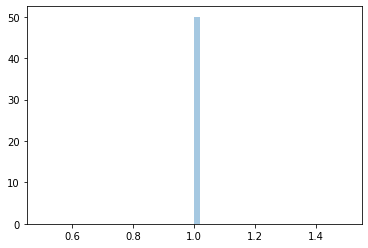

In [123]:
df = np.where((session['not_skipped'] == 'False'),0,1)
sns.distplot(df) 